In [1]:
# !wget https://github.com/jbrownlee/Datasets/releases/download/Flickr8k/Flickr8k_Dataset.zip
# !wget https://github.com/jbrownlee/Datasets/releases/download/Flickr8k/Flickr8k_text.zip

In [2]:
# !unzip Flickr8k_Dataset.zip -d images
# !unzip Flickr8k_text.zip -d captions

## Importing the necessary Libraries

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

In [4]:
# Now setup the GPU configuration
device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')
print(device)


cuda:1


In [5]:
l=os.listdir("images/Flicker8k_Dataset")
print(len(l))

8091


In [6]:
# Location of the Flickr8k_Images folder
images_folder = 'images/Flicker8k_Dataset/'

# Location of captions file
captions_filename = 'captions/Flickr8k.lemma.token.txt'

# Load the data
file = open(captions_filename, 'r') 

# Read all captions
captions = file.read()

# Close the file
file.close()

# Split the captions by new line character
captions = captions.split('\n')
print(len(captions))

# Create a dictionary to store the captions of each image
captions_dict = {}

# Iterate through the captions
for caption in captions:
    # Split the caption by white space
    caption = caption.split()
    
    # The first part of the caption is the image id
    
    
    image_id = caption[0]
    
    # The rest of the caption is the caption
    image_caption = caption[1:]
    
    # Remove the filename from the image id
    image_id = image_id.split('.')[0]
    
    # If the image id is not in the dictionary, add it
    if image_id not in captions_dict:
        captions_dict[image_id] = []
    
    # Add the caption to the list
    captions_dict[image_id].append(image_caption)
    
# Display the first 5 captions of the first image
print(captions_dict['1000268201_693b08cb0e'])

40455
[['A', 'child', 'in', 'a', 'pink', 'dress', 'be', 'climb', 'up', 'a', 'set', 'of', 'stair', 'in', 'an', 'entry', 'way', '.'], ['A', 'girl', 'go', 'into', 'a', 'wooden', 'building', '.'], ['A', 'little', 'girl', 'climb', 'into', 'a', 'wooden', 'playhouse', '.'], ['A', 'little', 'girl', 'climb', 'the', 'stair', 'to', 'her', 'playhouse', '.'], ['A', 'little', 'girl', 'in', 'a', 'pink', 'dress', 'go', 'into', 'a', 'wooden', 'cabin', '.']]


# Let us plot some images and their captions

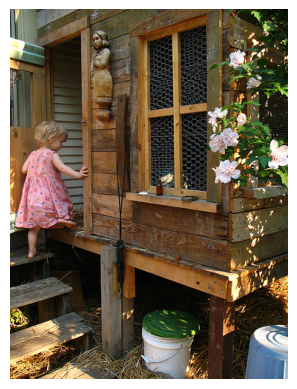

A child in a pink dress be climb up a set of stair in an entry way .
A girl go into a wooden building .
A little girl climb into a wooden playhouse .
A little girl climb the stair to her playhouse .
A little girl in a pink dress go into a wooden cabin .


In [7]:
# Now plot some images and their captions
import cv2

# Load the image
image = cv2.imread(images_folder + '1000268201_693b08cb0e.jpg')

# Convert the image to RGB (OpenCV uses BGR by default)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Plot the image
plt.imshow(image)
plt.axis('off')
plt.show()

# Print the captions of the image
for caption in captions_dict['1000268201_693b08cb0e']:
    print(' '.join(caption))
    


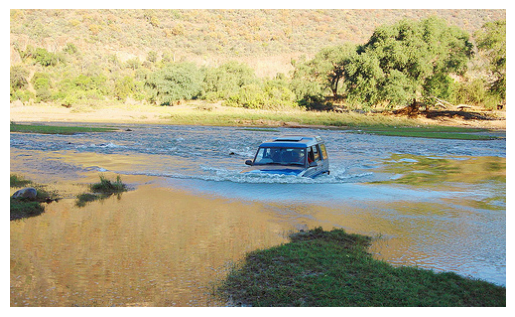

A car be in the water
A car sink in water .
A land rover be be drive across a river .
A Land Rover make its way through a deep pond .
An automobile be submerge in water , almost to door handle .





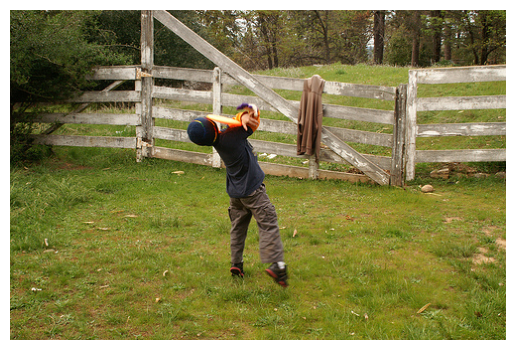

A boy be catch an orange Frisbee in front of a wooden gate .
A boy be try to catch a Frisbee in a field .
A boy play outside near a wooden fence .
A child in a blue cap be near an unpainted wooden fence .
A little boy stop a Frisbee with his face outside .





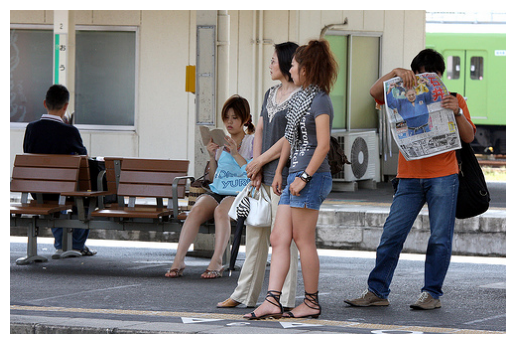

a few person waing around at a train stop
Five person on a sidewalk .
five person stand on a sidewalk
Three girl and a guy wait for a rail train .
three person stand on a sidewalk .





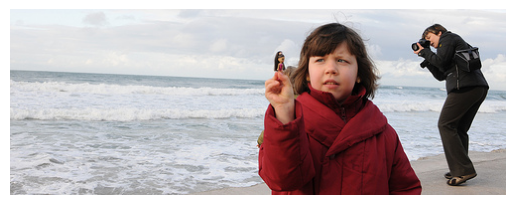

A child on a beach while a woman take picture nearby .
A little girl in red at a beach while a adult point a camera .
A man and a girl be at the shoreline while the man take a picture and a girl hods a doll
A woman be take a photograph on a beach at the edge of the water while a girl stand in the foreground .
A woman take picture of the surf and a child in the foreground .





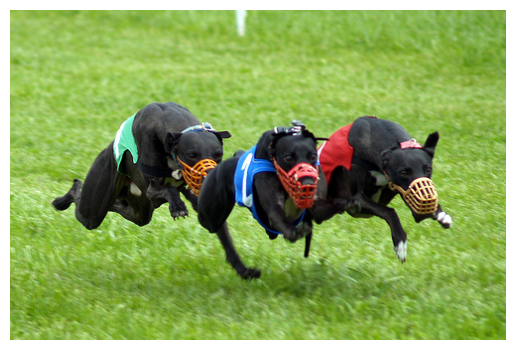

Three black dog wear muzzle race through the green grass .
Three dog leap up in the air as they compete in a race .
Three dog wear vest be run on the green grass .
Three muzzled and numbered dog run through the grass .
Three muzzle black dog race through the grass .





In [8]:
# Display five random images and their captions
for i in range(5):
    # Get a random image id
    image_id = np.random.choice(list(captions_dict.keys()))
    
    # Load the image
    image = cv2.imread(images_folder + image_id + '.jpg')
    
    # Convert the image to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Plot the image
    plt.imshow(image)
    plt.axis('off')
    plt.show()
    
    # Print the captions of the image
    for caption in captions_dict[image_id]:
        print(' '.join(caption))
        
    print('\n\n')
    
    

In [ ]:
# Now we will create a vocabulary of all the words in the captions
# Create a set to store the words
vocab = set()

# Iterate through the captions
for key in captions_dict.keys():
    for caption in captions_dict[key]:
        # Add all the words to the set
        vocab.update(caption)
        
# Print the total number of words in the vocabulary
print(f"Total words in the vocabulary: {len(vocab)}")

# Now we will create a dictionary to map each word to an index
word_to_index = {}
index_to_word = {}

# Add a special token for unknown words
word_to_index['<unk>'] = 0
index_to_word[0] = '<unk>'

# Add a special token for the start of the sentence
word_to_index['<start>'] = 1
index_to_word[1] = '<start>'

# Add a special token for the end of the sentence
word_to_index['<end>'] = 2
index_to_word[2] = '<end>'

# Add a special token for padding
word_to_index['<pad>'] = 3
index_to_word[3] = '<pad>'

# Start the index from 4
index = 4

# Iterate through all the words in the vocabulary
for word in vocab:
    # Map the word to the index
    word_to_index[word] = index
    
    # Map the index to the word
    index_to_word[index] = word
    
    # Increment the index
    index += 1
    
# Print the size of the vocabulary
print(f"Total vocabulary size after adding special tokens: {len(word_to_index)}")



Total words in the vocabulary: 7405
Total vocabulary size after adding special tokens: 7409


In [ ]:
# Now we will create a function to convert the captions to tensors

def convert_caption_to_tensor(caption, word_to_index, max_length):
    
    # Create a list to store the indexes
    tensor = []
    
    # Add the start token
    tensor.append(word_to_index['<start>'])
    
    # Iterate through all the words in the caption
    for word in caption:
        # If the word is in the word_to_index dictionary
        if word in word_to_index:
            # Add the index of the word to the tensor
            tensor.append(word_to_index[word])
        else:
            # Add the index of the unknown token to the tensor
            tensor.append(word_to_index['<unk>'])
            
        if len(tensor) == max_length-1:
            break
    
    # Add the end token
    tensor.append(word_to_index['<end>'])
    
    # Pad the tensor
    while len(tensor) < max_length:
        tensor.append(word_to_index['<pad>'])
    
    # Convert the tensor to a PyTorch tensor
    tensor = torch.tensor(tensor)
    
    return tensor

# Now we will create a function to convert the images to tensors

def convert_image_to_tensor(image_id, images_folder, image_size=(224, 224)):
    
    # Load the image
    
    image_path = images_folder + image_id + '.jpg'
    if not os.path.exists(image_path):
        print(f"Image file not found: {image_path}")
        return None
    
    image = cv2.imread(image_path)
    
    if image is None:
        print(f"Image not found: {image_path}")
        return None
    
    # check if the image is present

    
    # Convert the image to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Resize the image
    image = cv2.resize(image, image_size)
    
    # Convert the image to a PyTorch tensor
    image = torch.tensor(image)
    
    return image
        
       
    
# Now we will create a function to create the dataset

class Flickr8kDataset(torch.utils.data.Dataset):
        
        def __init__(self, images_folder, captions_dict, word_to_index, max_length):
            self.images_folder = images_folder
            self.captions_dict = captions_dict
            self.word_to_index = word_to_index
            self.max_length = max_length
            
            # Get the image ids
            self.image_ids = list(captions_dict.keys())
            
        def __len__(self):
            return len(self.image_ids)
        
        def __getitem__(self, index):
            
            # Get the image id of the image
            image_id = self.image_ids[index]
            
            # Get the image tensor
            image = convert_image_to_tensor(image_id, self.images_folder)
            
            # Get the caption tensor
            caption = convert_caption_to_tensor(self.captions_dict[image_id][0], self.word_to_index, self.max_length)
            
            return image, caption
        
# Now we will create the DataLoader

# Set the maximum length of the caption
max_length = 10

# Create the dataset
dataset = Flickr8kDataset(images_folder, captions_dict, word_to_index, max_length)

# Create the DataLoader
data_loader = torch.utils.data.DataLoader(dataset, batch_size=256, shuffle=True)

# Get a batch of data
images, captions = next(iter(data_loader))

# Print the shape of the images and captions
print(f"shape of images: {images.shape}")

# Print the shape of the captions
print(f"caption shape: {captions.shape}")

# Print the length of data_loader
print(f"Length of data_loader: {len(data_loader)}")



shape of images: torch.Size([256, 224, 224, 3])
caption shape: torch.Size([256, 10])
Length of data_loader: 32


In [11]:
# Now we will create the Encoder using a pre-trained ResNet model

class Encoder(nn.Module):
    
    def __init__(self, embed_size):
        super(Encoder, self).__init__()
        
        # Load the ResNet model
        resnet = torch.hub.load('pytorch/vision:v0.6.0', 'resnet50', pretrained=True)
        
        # Remove the classification layer
        modules = list(resnet.children())[:-1]
        self.resnet = nn.Sequential(*modules)
        
        # Create the linear layer
        self.linear = nn.Linear(resnet.fc.in_features, embed_size)
        
        # Create the batch normalization layer
        # self.batch_norm = nn.BatchNorm1d(embed_size, momentum=0.01)
        
    def forward(self, x):
        
        # Pass the image through the ResNet model
        x = x.float()/255
        x = x.permute(0, 3, 1, 2)
        
        x = self.resnet(x)
        
        # Flatten the output
        x = x.view(x.size(0), -1)
        
        # Pass the output through the linear layer
        x = self.linear(x)
        
        # Pass the output through the batch normalization layer
        # x = self.batch_norm(x)
        
        return x
    
# Create the encoder
encoder = Encoder(256)

# Pass the images through the encoder
features = encoder(images)

# Print the shape of the features
print(f"features shape: {features.shape}")



Using cache found in /home/shivac/.cache/torch/hub/pytorch_vision_v0.6.0


features shape: torch.Size([256, 256])


In [12]:
# Now we will create the Decoder

class Decoder(nn.Module):
        
        def __init__(self, embed_size, hidden_size, vocab_size, max_length, num_layers=1):
            super(Decoder, self).__init__()
            
            self.embed = nn.Embedding(vocab_size, embed_size)
            
            # self.feature_to_hidden = nn.Linear(256, hidden_size)
            # self.feature_to_cell = nn.Linear(256, hidden_size)
            
            self.lstm = nn.LSTM(embed_size, hidden_size, num_layers, batch_first=True)
            
            self.linear = nn.Linear(hidden_size, vocab_size)
            
            self.max_length = max_length
            
            self.num_layers = num_layers
            
            self.hidden_size = hidden_size 
            
        def forward(self, features, captions):
                
                # Create the initial hidden and cell states
                # hidden = self.feature_to_hidden(features)
                # cell = self.feature_to_cell(features)
                
                # hidden = torch.zeros(1, features.size(0), 512).to(device)
                # cell = torch.zeros(1, features.size(0), 512).to(device)
                
                # Create the embedded captions
                captions = captions[:, :-1]
                captions = captions.to(device)
                embeddings = self.embed(captions).to(device)
                
                features = features.to(device)
                # Concatenate the features and captions
                features = features.unsqueeze(1)
                
                # Pass the features and captions through the LSTM
                lstm_inputs = torch.cat((features, embeddings), dim=1)
                
                # outputs, _ = self.lstm(lstm_inputs, (hidden, cell))
                outputs, _ = self.lstm(lstm_inputs)
                
                # Pass the outputs through the linear layer
                outputs = self.linear(outputs)
                
                return outputs
            
        def sample(self, features, states=None):
            
            # Create a list to store the output words
            sampled_ids = []
            
           
            features = features.to(device)
            # hidden = torch.zeros(1, features.size(0), 512).to(device)
            # cell = torch.zeros(1, features.size(0), 512).to(device)
            
            hidden,cell = (torch.randn(self.num_layers,1,self.hidden_size).to(device),torch.randn(self.num_layers,1,self.hidden_size).to(device))
            
            # Create a tensor to store the input word
            inputs = features.unsqueeze(1)
            
            for i in range(self.max_length):
                
                # Pass the inputs through the LSTM
                outputs, (hidden, cell) = self.lstm(inputs, (hidden, cell))
                
                # Pass the outputs through the linear layer
                outputs = self.linear(outputs)
                
                # Get the index of the word with the maximum score
                
                outputs = outputs.squeeze(1)
                
                predicted = outputs.argmax(1)
                # predicted = outputs.argmax(2)
                
                # Append the word to the list
                
                
                # Break if the word is the end token
                if predicted.item() == 2:
                    break
                
                sampled_ids.append(predicted.item())
                
                # Create the inputs for the next iteration
                inputs = self.embed(predicted.unsqueeze(0))
                
            return sampled_ids
            
        
        
# Create the decoder
decoder = Decoder(256, 512, len(word_to_index), max_length).to(device)

# Pass the features and captions through the decoder
outputs = decoder(features, captions)


# Print the shape of the outputs
print(f"outputs shape: {outputs.shape}")




outputs shape: torch.Size([256, 10, 7409])


In [13]:
# Now we will create the model

class ImageCaptioningModel(nn.Module):
    
    def __init__(self, encoder, decoder):
        super(ImageCaptioningModel, self).__init__()
        
        self.encoder = encoder
        self.decoder = decoder
        
    def forward(self, images, captions):
        
        # Pass the images through the encoder
        features = self.encoder(images)
        
        # Pass the features and captions through the decoder
        outputs = self.decoder(features, captions)
        
        
        
        return outputs
    
# Create the model
model = ImageCaptioningModel(encoder, decoder)

# Pass the images and captions through the model
outputs = model(images, captions)

# Print the shape of the outputs
print(f"outputs shape: {outputs.shape}")




outputs shape: torch.Size([256, 10, 7409])


In [33]:
# Now we will create the loss function and the optimizer

# Create the loss function


model.to(device)
criterion = nn.CrossEntropyLoss()

# Create the optimizer
params = list(model.encoder.linear.parameters()) + list(model.decoder.parameters())

optimizer = optim.Adam(params, lr=0.001)

# Now we will train the model

# Set the number of epochs
num_epochs = 50

# Iterate through the epochs

for epoch in range(num_epochs):
        
        # Set the model to train mode
        model.train()
        
        # Iterate through the data loader
        for images, captions in data_loader:       
            
            # Pass the images and captions through the model
            model.encoder.zero_grad()
            model.decoder.zero_grad()
            
            images, captions = images.to(device), captions.to(device)    
            outputs = model(images, captions)           
            
             
            loss = criterion(outputs.view(-1, len(word_to_index)), captions.view(-1))
            
           
            
            # Zero the gradients
            # optimizer.zero_grad()
            
            # Backward pass
            loss.backward()
            
            # Update the weights
            optimizer.step()
            
            
            # print(f"loss {loss}")
        # Print the loss
        print(f"Epoch {epoch+1}, Loss: {loss.item()}")
        
# Save the model
torch.save(model.state_dict(), 'model.pth')


Epoch 1, Loss: 0.7765872478485107
Epoch 2, Loss: 0.734163761138916
Epoch 3, Loss: 0.7382508516311646
Epoch 4, Loss: 0.6792253851890564
Epoch 5, Loss: 0.6645451188087463
Epoch 6, Loss: 0.6594493389129639
Epoch 7, Loss: 0.6404139995574951
Epoch 8, Loss: 0.616550624370575
Epoch 9, Loss: 0.5839274525642395
Epoch 10, Loss: 0.5616214871406555
Epoch 11, Loss: 0.5516252517700195
Epoch 12, Loss: 0.5312373042106628
Epoch 13, Loss: 0.5189898610115051
Epoch 14, Loss: 0.4670600891113281
Epoch 15, Loss: 0.49047744274139404
Epoch 16, Loss: 0.4671134948730469
Epoch 17, Loss: 0.4490073025226593
Epoch 18, Loss: 0.46062615513801575
Epoch 19, Loss: 0.44464078545570374
Epoch 20, Loss: 0.46655505895614624
Epoch 21, Loss: 0.3761778175830841
Epoch 22, Loss: 0.37460023164749146
Epoch 23, Loss: 0.36555367708206177
Epoch 24, Loss: 0.31886106729507446
Epoch 25, Loss: 0.297054260969162
Epoch 26, Loss: 0.3059810400009155
Epoch 27, Loss: 0.2836327850818634
Epoch 28, Loss: 0.27189555764198303
Epoch 29, Loss: 0.302602

In [34]:
# Load the saved model
model.load_state_dict(torch.load('model.pth'))


/tmp/ipykernel_2824499/902462163.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('model.pth'))


<All keys matched successfully>

In [35]:
print(device)

cuda:1


torch.Size([1, 224, 224, 3])
torch.Size([1, 10])
torch.Size([1, 10, 7409])
torch.Size([1, 256])
tensor([[   1, 4392, 3770, 1138, 7395, 7208, 4296,  345, 4545,    2]],
       device='cuda:1')
[1, 4392, 1138, 246, 4755, 4441, 2676, 6743, 345]
<start> A city worker be stand by a person 

Actual Caption: tensor([   1, 4392, 3770, 1138, 7395, 7208, 4296,  345, 4545,    2],
       device='cuda:1')
<start> A busy city street with many person walk <end> 

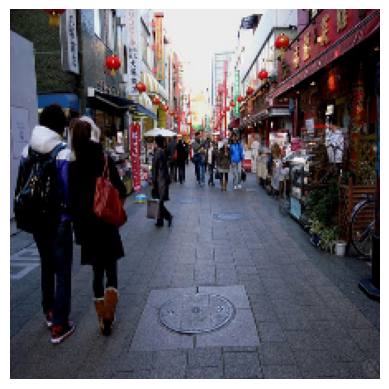

In [36]:
# Now lets do some predictions

# Set the model to evaluation mode
model.eval()

# Get exactly one image and caption from batch of data
images, captions = next(iter(data_loader))

# Pass the image through the model
image = images[0].unsqueeze(0).to(device)
caption = captions[0].unsqueeze(0).to(device)


print(image.shape)
print(caption.shape)

# Pass the image through the model
outputs = model(image, caption)

print(outputs.shape)

# Get the predicted caption

print(encoder(image).shape) 

print(caption)
predicted_caption = decoder.sample(encoder(image))

print(predicted_caption)
# Print the predicted caption
for word_id in predicted_caption:
    word = index_to_word[word_id]
    print(word, end=' ')
    
# Print the actual caption
print('\n\nActual Caption:',caption[0])
for word_id in caption[0]:
    word = index_to_word[word_id.item()]
    print(word, end=' ')
    
#plot the image
image = image[0].cpu().numpy()
# image = np.transpose(image, (1, 2, 0))
plt.imshow(image)
plt.axis('off')
plt.show()



In [37]:
# Now calculate the BLEU score
torch.cuda.empty_cache()
from nltk.translate.bleu_score import sentence_bleu

# Set the model to evaluation mode
model.eval()

# Create a list to store the actual and predicted captions
actual_captions = []
predicted_captions = []

# Iterate through the data loader
for images, captions in data_loader:    
    for i in range(images.shape[0]):
        image = images[i].unsqueeze(0).to(device)
        caption = captions[i].unsqueeze(0).to(device)
        
        # Pass the image through the model
        outputs = model(image, caption)
        
        # Get the predicted caption
        predicted_caption = decoder.sample(encoder(image))
        
        # Append the actual and predicted captions
        actual_captions.append(caption)
        predicted_captions.append(predicted_caption)
        
# Print the length of the actual and predicted captions
print(f"Length of actual captions: {len(actual_captions)}")
print(f"Length of predicted captions: {len(predicted_captions)}")

 


Length of actual captions: 8091
Length of predicted captions: 8091


In [38]:
# Predicted sentences and actual sentences
predicted_sentences = []
actual_sentences = []

# Iterate through the predicted and actual captions

for predicted_caption, actual_caption in zip(predicted_captions, actual_captions):
    
    # Create a list to store the words
    predicted_sentence = []
    actual_sentence = []
    
    # Iterate through the predicted caption
    for word_id in predicted_caption:
        word = index_to_word[word_id]
        
        # Append the word to the list
        predicted_sentence.append(word)
        
        # Break if the word is the end token
        if word == '<end>':
            break
        
    # Iterate through the actual caption
    for word_id in actual_caption[0]:
        word = index_to_word[word_id.item()]
        
        # Append the word to the list
        actual_sentence.append(word)
        
        # Break if the word is the end token
        if word == '<end>':
            break
        
    # remove the start token and end token in actual sentence
    
    actual_sentence = actual_sentence[1:-1]
    predicted_sentence = predicted_sentence[1:-1]
        
    # Append the sentence to the list
    predicted_sentences.append(predicted_sentence)
    actual_sentences.append(actual_sentence)
    
    


In [39]:
print(actual_sentences)

[['A', 'crowd', 'of', 'person', 'in', 'front', 'of', 'a'], ['A', 'man', 'in', 'dark', 'clothes', 'lean', 'off', 'of'], ['A', 'dog', 'with', 'a', 'Frisbee', 'in', 'front', 'of'], ['Men', 'dress', 'in', 'winter', 'clothing', 'stand', 'against', 'a'], ['Four', 'man', 'be', 'stand', 'outside', 'in', 'front', 'of'], ['A', 'man', 'in', 'orange', 'pants', 'and', 'a', 'ponytail'], ['A', 'boy', 'jump', 'from', 'one', 'picnic', 'table', 'to'], ['A', 'man', 'in', 'a', 'skeleton', 'print', 'outfit', 'be'], ['A', 'group', 'of', 'girl', 'in', 'cheerleader', 'clothing', 'tosses'], ['A', 'soccer', 'player', 'in', 'red', 'run', 'in', 'front'], ['A', 'dog', 'chase', 'another', 'dog', 'by', 'a', 'lake'], ['A', 'dog', 'in', 'the', 'snow', '.'], ['A', 'dog', 'be', 'near', 'three', 'farm', 'animal', 'with'], ['a', 'girl', 'carry', 'a', 'yellow', 'bag', 'be', 'look'], ['A', 'mountain', 'biker', 'in', 'red', 'be', 'ride', 'on'], ['A', 'black', 'and', 'white', 'dog', 'be', 'run', 'through'], ['A', 'girl', 'wit

In [40]:
print(predicted_sentences)

[['A', 'crowd', 'of', 'person', 'be', 'stand', 'on'], ['A', 'man', 'in', 'a', 'black', 'hoodie', 'watch'], ['Two', 'brown', 'and', 'black', 'dog', 'wrestle', 'in'], ['A', 'man', 'and', 'a', 'woman', 'walk', 'away'], ['A', 'group', 'of', 'walk', 'and', 'woman', 'walk'], ['A', 'man', 'in', 'blue', 'short', 'stand', 'on'], ['a', 'couple', 'wear', 'a', 'bright', 'colored', 'helmet'], ['A', 'biker', 'in', 'red', 'ride', 'a', 'rocky'], ['A', 'group', 'of', 'player', 'on', 'a', 'team'], ['Men', 'participate', 'in', 'a', 'soccer', 'game'], ['A', 'black', 'and', 'white', 'dog', 'be', 'jump'], ['A', 'dog', 'jump', 'through', 'a', 'field'], ['A', 'team', 'be', 'be', 'watch', 'two', 'two'], ['a', 'couple', 'stand', 'outside', 'a'], ['A', 'mountain', 'biker', ',', 'wear', 'a', 'helmet'], ['A', 'man', 'be', 'stand', 'on', 'snow', 'and'], ['A', 'large', 'man', 'sit', 'in', 'a', 'military'], ['A', 'group', 'of', 'person', 'stand', 'and', 'look'], ['A', 'boy', 'hit', 'a', 'soccer', 'ball', 'with'], ['T

In [41]:
# Now calculate the BLEU score
bleu_score = 0

# Iterate through the sentences
for predicted_sentence, actual_sentence in zip(predicted_sentences, actual_sentences):
    
    # Calculate the BLEU score
    bleu_score += sentence_bleu([actual_sentence], predicted_sentence)
    
print(bleu_score)
# Calculate the average BLEU score
bleu_score /= len(predicted_sentences)

# Print the BLEU score
print(f"BLEU score: {bleu_score}")

1064.8568029807209
BLEU score: 0.13161003621069348
